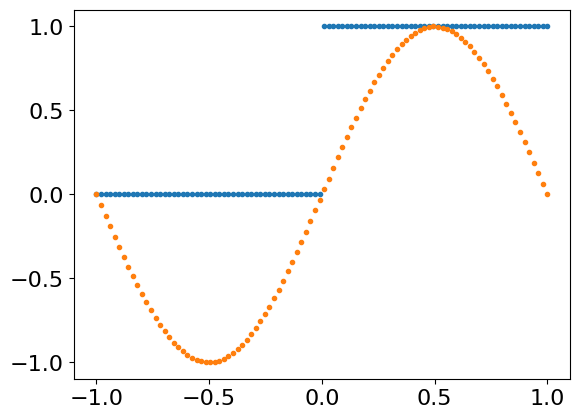

In [4]:
import numpy as np
import models_parallel  as models
import ClassicalModel   as CM
import matplotlib.pyplot as plt
import torch 
import random

def fun(x):
    return np.heaviside(x,0)
def fun2(x):
    return np.sin(np.pi*x)

input_eval  = np.linspace(-1,1, 100)
y_true      = fun(input_eval)
y_true_eval = fun2(input_eval)

input_train  = np.linspace(-1,1, 20)
y_true_t      = fun(input_train)
y_true_evalt = fun2(input_train)

plt.plot(input_eval,y_true,".")
plt.plot(input_eval,y_true_eval,".")
plt.show()

# Plot com os melhores resultados em termo do número de camadas.

c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\models_parallel.py:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)

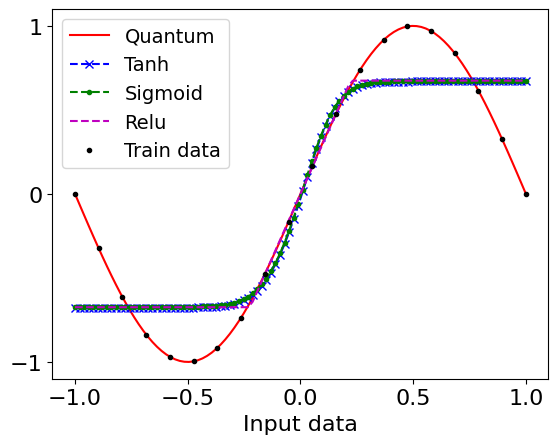

In [5]:

#fig, ax = plt.subplots(figsize=(8, 6))
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 16})
plt.yticks([-1,0,1])
plt.xticks([-1,-0.5,0,0.5,1])
plt.xlabel("Input data")
#ax.text(-1.25, 1.2, '(a)', fontsize=17)

# Quântico
number_of_layers = 2 
sample_index = 40
quantum = models.Train(D= 30,number_of_layers=number_of_layers)
quantum.load_checkpoint(checkpoint_path=f'data_regressaoC/quantum/{number_of_layers}layer/model_sin{sample_index}.pth')
predict = quantum.evaluate(input = input_eval)

            
plt.plot(input_eval,predict,f"r-",label=f"Quantum")

# Classico
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]
color       =  ['b--x','g--.','m--']
manualSeed  = [77,48,56]
N_of_layer  = [5,5,3]

for _ in range(3):
    np.random.seed(manualSeed[_])
    random.seed(manualSeed[_])
    torch.manual_seed(manualSeed[_])
    
    modelo  = CM.ClassicalModel(
        epochs      = 1000,
        neuronio    = [1]*N_of_layer[_],
        activation  = activation_fuction[_],
        lr          = 0.01
    )
    modelo.load_checkpoint(checkpoint_path=f"data_regressaoC/classical/sino_comparing_by_layer/seed{manualSeed[_]}_layer{N_of_layer[_]}_{name_function[_]}")
    predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
    plt.plot(input_eval,predict,f"{color[_]}",label=f"{name_function[_]}")            
plt.plot(input_train,y_true_evalt,"k.",label="Train data")
plt.legend(fontsize=14)
plt.savefig("plote_best_sin_l.pdf", dpi=1000, bbox_inches='tight')
plt.show()


c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\models_parallel.py:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)

0.021265857295966587 3 20


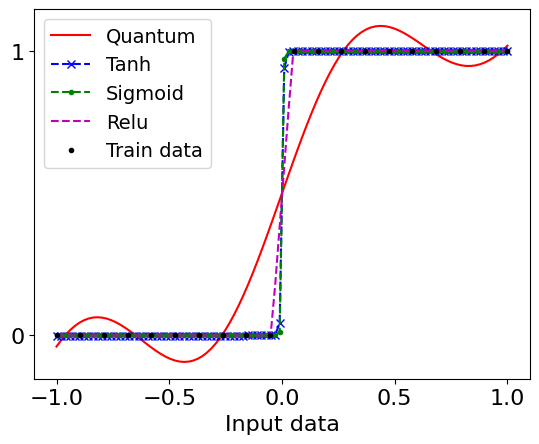

In [6]:
menor_pred      = y_true_eval
erro            = 1
number_of_layers= 0 
sample_index    = 0
for j in [3]:
    for i in [20]:
        quantum = models.Train(D= 30,number_of_layers=j)
        quantum.load_checkpoint(checkpoint_path=f'data_regressaoC/quantum/{j}layer/model_Heaviside{i}.pth')

        predict = quantum.evaluate(input = input_eval)
        erro_t = np.mean((predict-y_true)**2)
        
        if erro_t < erro:
            erro = erro_t
            menor_pred = predict
            number_of_layers = j
            sample_index = i
print(erro,number_of_layers,sample_index)        
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 16})
#plt.title(f"Heaviside Function Prediction", fontsize=17)

#plt.ylabel(r"$\langle \hat{x} \rangle$")
plt.yticks([-1,0,1])
plt.xticks([-1,-0.5,0,0.5,1])
plt.xlabel("Input data")
#ax.text(-1.23, 1.18, '(b)', fontsize=17)
plt.plot(input_eval,menor_pred,f"r-",label=f"Quantum")

# Classico
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]
color       =  ['b--x','g--.','m--']
manualSeed  = [34,50,38]
N_of_layer  = [5,5,2]

for _ in range(3):
    np.random.seed(manualSeed[_])
    random.seed(manualSeed[_])
    torch.manual_seed(manualSeed[_])
    
    modelo  = CM.ClassicalModel(
        epochs      = 1000,
        neuronio    = [1]*N_of_layer[_],
        activation  = activation_fuction[_],
        lr          = 0.01
    )
    modelo.load_checkpoint(checkpoint_path=f"data_regressaoC/classical/Heaviside_comparing_by_layer/seed{manualSeed[_]}_layer{N_of_layer[_]}_{name_function[_]}")
    predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
    plt.plot(input_eval,predict,f"{color[_]}",label=f"{name_function[_]}")            
plt.plot(input_train,y_true_t,"k.",label="Train data")
plt.legend(fontsize=14)
plt.savefig("plote_best_heavy_l.pdf",dpi=1000, bbox_inches='tight')
plt.show()

# Plot com os melhores resultados em termo do número de paramatro.

In [7]:
from itertools import product
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]
def all_neuro(N_layer,numberofneuro):
    todas_combinacoes = []
    for n in range(1, N_layer + 1):
        todas_combinacoes.extend(product(range(1, numberofneuro + 1), repeat=n))

    todas_combinacoes_util=[]
    N_of_parameter = []
    index_all_combinatino = []
    for indice in range(len(todas_combinacoes)):
        modelo  = CM.ClassicalModel(
                epochs      = 1000,
                neuronio    = todas_combinacoes[indice],
                activation  = activation_fuction[0],
                lr          = 0.01) 
        if modelo.Number_of_parameter() in (5,10,15,20,25):
            todas_combinacoes_util.append( todas_combinacoes[indice])
            N_of_parameter.append(modelo.Number_of_parameter())
            index_all_combinatino.append(indice)
    return todas_combinacoes_util,N_of_parameter,index_all_combinatino
combination,number_combination_parameter,index_combination = all_neuro(3,10)      

c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\models_parallel.py:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)

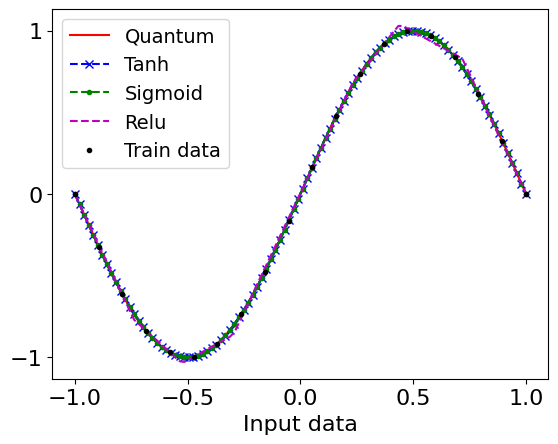

In [8]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 16})
plt.yticks([-1,0,1])
plt.xticks([-1,-0.5,0,0.5,1])
plt.xlabel("Input data")
#ax.text(-1.25, 1.2, '(a)', fontsize=17)

################### Quântico ################### 
number_of_layers = 2 
sample_index = 40
quantum = models.Train(D= 30,number_of_layers=number_of_layers)
quantum.load_checkpoint(checkpoint_path=f'data_regressaoC/quantum/{number_of_layers}layer/model_sin{sample_index}.pth')
predict = quantum.evaluate(input = input_eval)

            
plt.plot(input_eval,predict,f"r-",label=f"Quantum")
#plt.plot(input_train,y_true_evalt,"k.",label="Train data")

################### Classico ################### 
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]
color       =  ['b--x','g--.','m--']
manualSeed  = [88,23,1]
indice  = [1,1,1]

for _ in range(3):
    np.random.seed(manualSeed[_])
    random.seed(manualSeed[_])
    torch.manual_seed(manualSeed[_])
    
    modelo  = CM.ClassicalModel(
        epochs      = 10000,
        neuronio    = combination[indice[_]],
        activation  = activation_fuction[_],
        lr          = 0.01)
    modelo.load_checkpoint(checkpoint_path=f"data_regressaoC/classical/sino_comparing_by_parameter/seed{manualSeed[_]}_indice{indice[_]}_{name_function[_]}")
    predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
    plt.plot(input_eval,predict,f"{color[_]}",label=f"{name_function[_]}")            
plt.plot(input_train,y_true_evalt,"k.",label="Train data") 
plt.legend(fontsize=14)
plt.savefig("plote_best_sin_p.pdf",dpi =1000, bbox_inches='tight')
plt.show()


c:\Users\Gubio\OneDrive\Desktop\Gubio\cv-torchgates\Comparison\models_parallel.py:195: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)

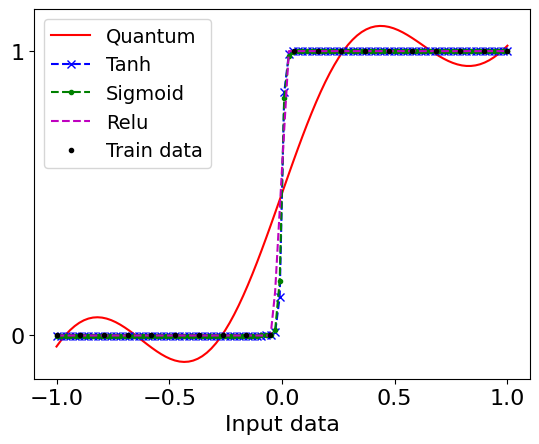

In [9]:
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 16})
plt.yticks([-1,0,1])
plt.xticks([-1,-0.5,0,0.5,1])
plt.xlabel("Input data")
#ax.text(-1.25, 1.18, '(b)', fontsize=17)

################### Quântico ################### 
number_of_layers = 3 
sample_index = 20
quantum = models.Train(D= 30,number_of_layers=number_of_layers)
quantum.load_checkpoint(checkpoint_path=f'data_regressaoC/quantum/{number_of_layers}layer/model_Heaviside{sample_index}.pth')
predict = quantum.evaluate(input = input_eval)

            
plt.plot(input_eval,predict,f"r-",label=f"Quantum")

################### Classico ################### 
activation_fuction = [torch.nn.Tanh(),torch.nn.Sigmoid(),torch.nn.ReLU()]
name_function = ["Tanh","Sigmoid","Relu"]
color       =  ['b--x','g--.','m--']
manualSeed  = [48,39,95]
indice  = [13,10,3]

for _ in range(3):
    np.random.seed(manualSeed[_])
    random.seed(manualSeed[_])
    torch.manual_seed(manualSeed[_])
    
    modelo  = CM.ClassicalModel(
        epochs      = 10000,
        neuronio    = combination[indice[_]],
        activation  = activation_fuction[_],
        lr          = 0.01)
    modelo.load_checkpoint(checkpoint_path=f"data_regressaoC/classical/Heaviside_comparing_by_parameter/seed{manualSeed[_]}_indice{indice[_]}_{name_function[_]}")
    predict = modelo.evaluate(input_eval.reshape(-1,1)).detach().numpy()
    plt.plot(input_eval,predict,f"{color[_]}",label=f"{name_function[_]}")            
plt.plot(input_train,y_true_t,"k.",label="Train data")  
plt.legend(fontsize=14)
plt.savefig("plote_best_heavy_p.pdf",dpi =1000, bbox_inches='tight')
plt.show()
